In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#Getting the path of the data
!gdown --id '1pAat3ZaMZHJup7Nk__Bxd64BqOvoaUHy'

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pAat3ZaMZHJup7Nk__Bxd64BqOvoaUHy
To: /content/breast_cancer (2).csv
100% 15.0k/15.0k [00:00<00:00, 12.3MB/s]


In [85]:
df=pd.read_csv('/content/breast_cancer (2).csv')

In [86]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [87]:
#Statical Analysis

df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [89]:
#Check for null vlaues

df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [90]:
df.duplicated().sum()
#Duplicates are there indicates that most people have same type with same signs

234

<Figure size 720x720 with 0 Axes>

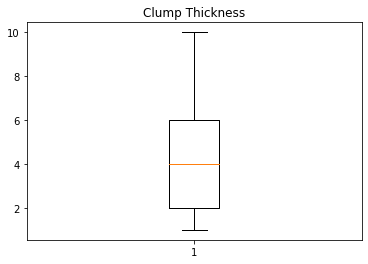

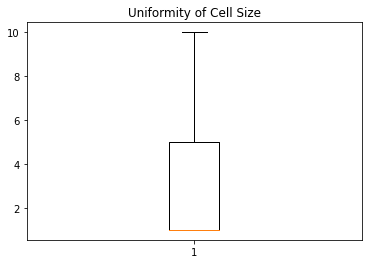

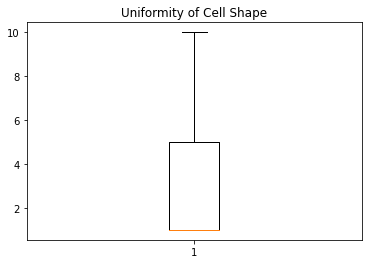

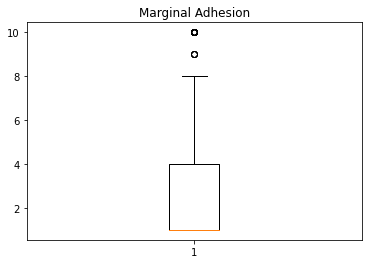

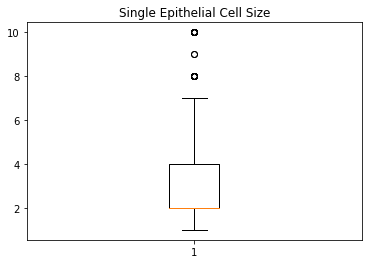

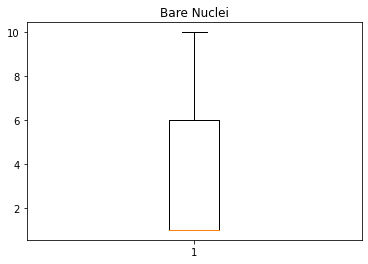

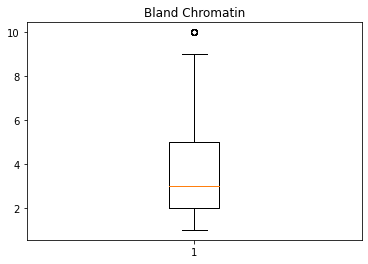

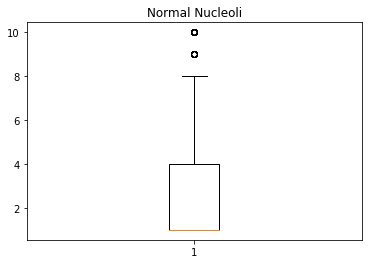

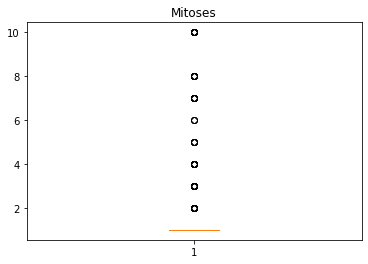

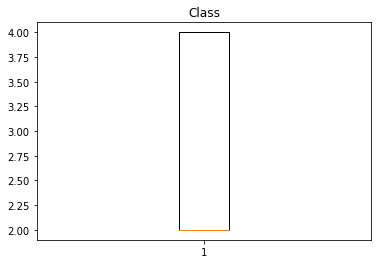

In [91]:
#Outliers detection
plt.figure(figsize=(10,10))
for i in df.columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

Every feature has good shape but some are not like 'Margin Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin','Normal Nucleoli' and Mitroses have many outliers.

In [92]:
#Outliers removing
df.shape

(683, 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


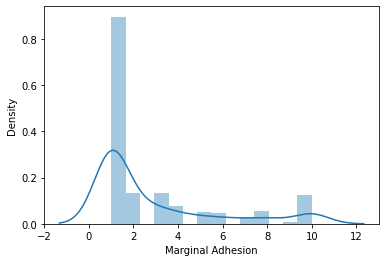

In [93]:
sns.distplot(df['Marginal Adhesion'])

In [94]:
#Removing by threshold quantile
max_threshold=df['Marginal Adhesion'].quantile(0.95)
max_threshold

10.0

In [95]:
#Check for data that is outlier
len(df[df['Marginal Adhesion']>max_threshold])

0

In [96]:
df1=df[df['Marginal Adhesion']<max_threshold]

In [97]:
df1.shape

(628, 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


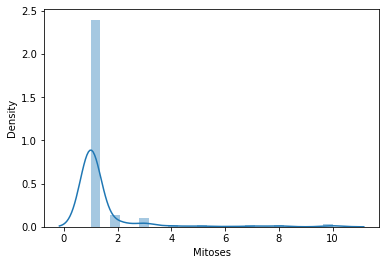

In [98]:
sns.distplot(df1['Mitoses'])

In [99]:
#max_threshold=df1['Mitoses'].quantile(0.95)
#max_threshold

In [100]:
#df1[df1['Mitoses']>max_threshold].shape

In [101]:
#df2=df1[df1['Mitoses']<max_threshold]

In [102]:
#df2

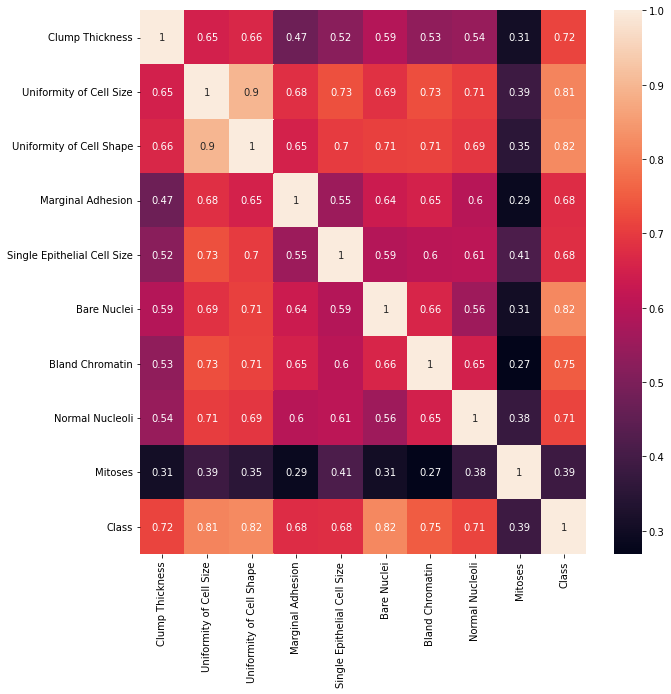

In [105]:
#Let's check for correlation between theme

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

So here is the good relation of Class feature with all the remaing features

In [106]:
#Dependent and independent division
x=df1.drop(['Class'],axis=1)
y=df1['Class']

In [107]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

439 189
439 189


In [108]:
#Applying the model Logistic regression

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(x_train,y_train)
prediction=lr_model.predict(x_test)
lr_model.score(x_test,y_test)

0.9576719576719577

array([[132,   5],
       [  3,  49]])

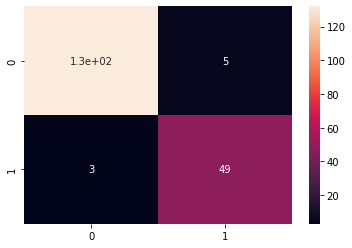

In [113]:
#Let's see the confusion metrics of that model
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
cm


Only few misclassificed data

In [116]:
#Classification report
from sklearn.metrics import classification_report
clr=classification_report(y_test,prediction)
print(clr)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.91      0.94      0.92        52

    accuracy                           0.96       189
   macro avg       0.94      0.95      0.95       189
weighted avg       0.96      0.96      0.96       189



Here the Precision, Recall and F1-score is similar so we don't need to apply any Imbanlanced data techinque.

In [117]:
prediction

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4])

In [118]:
prediction_train=lr_model.predict(x_train)

In [145]:
#Testing
val=np.array([2	,1	,1	,1	,2	,1	,2	,1	,1])
val=val.reshape(1,-1)
single_pre=lr_model.predict(val)
print(single_pre)

[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [144]:
df1.sample()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
519,2,1,1,1,2,1,2,1,1,2


In [ ]:
0